In [1]:
import seisbench
import seisbench.util
from base import BenchmarkDataset, WaveformDataWriter

from pathlib import Path
import h5py
import pandas as pd
import numpy as np

/mnt/nas4/weiwei/.pyenv/versions/SeisBench/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### TSMIP (目前只用 2020 為例)

In [2]:
class TSMIP(BenchmarkDataset):
    
    def __init__(self, **kwargs):
        # ======================= #
        # TODO: citation, license #
        # ======================= #
        citation = ()
        license = ""
        super().__init__(citation=citation, license=license, **kwargs)
    
    def _download_dataset(self, writer: WaveformDataWriter, basepath=None, **kwargs):
        path = self.path
        
        # TSMIP: containing 2011~2020
        years = [str(y) for y in range(2011, 2021)]
        
        if basepath is None:
            raise ValueError(
                "No cached version of TSMIP found. "
            )

        basepath = Path(basepath)
        
        # ========================== #
        # TODO: 檢查有沒有十年份的資料 #
        # ========================== #
        if not (basepath / "metadata_2020.csv").is_file():
            raise ValueError(
                "Basepath does not contain file metadata_2020.csv. "
            )
        if not (basepath / "chunks_2020.hdf5").is_file():
            raise ValueError(
                "Basepath does not contain file chunks_2020.hdf5. "
            )
            
        # Data format
        writer.data_format = {
            "dimension_order": "CW",
            "component_order": "ZNE",
            "sampling_rate": 200,
            "measurement": "acceleration",
            "unit": "cmps2",
        }
        # ============================================= #
        # TODO: 之後上傳檔案到網路上後，新增下載方式的 code
        # ============================================= #
    
        total_trace = 0
        for y in years:
            print('years: ', y)
            # Loading metadata (ex. 2020)，之後一次 load 所有年份的資料進來
            meta_path = 'metadata_' + y + '.csv'
            metadata = pd.read_csv(basepath / meta_path)

            metadata['split'] = self.set_split(y)

            # Adding traces (ex. 2020)，之後一次 load 所有年份的資料進來
            hdf5_path = 'chunks_' + y + '.hdf5'
            with h5py.File(basepath / hdf5_path) as f:
                gdata = f["data"]
                for _, row in metadata.iterrows():
                    row = row.to_dict()
                    
                    # Adding trace only when waveform is available
                    if row['trace_completeness'] == 1:
                        waveforms = gdata[row["trace_name"]][()]
    
                        writer.add_trace(row, waveforms)
                        total_trace += 1
            
        # Total number of traces
        writer.set_total(total_trace)
        
    @staticmethod
    def set_split(year):
        if year == '2020':
            return 'dev'
        elif year == '2019':
            return "test"
        else:
            return 'train'
        
    # ==================================================== #
    # TODO: function -> 只選一個 trace 只包含一個事件的 case #
    # ==================================================== #
    
    # ======================================= #
    # TODO: 依照 trace_name，去依照事件來 load #
    # ======================================= #

In [3]:
kwargs={'download_kwargs': {'basepath': '/mnt/nas2/TSMIP/seisbench/'}}
data = TSMIP(**kwargs)

2022-07-05 14:54:50,497 | seisbench | WARNING | Dataset TSMIP not in cache.
2022-07-05 14:54:50,499 | seisbench | WARNING | Dataset TSMIP not in SeisBench repository. Starting download and conversion from source.


years:  2011


Traces converted: 3662it [00:03, 1111.70it/s]

years:  2012


Traces converted: 8898it [00:11, 529.16it/s] 

years:  2013


Traces converted: 15782it [00:22, 900.02it/s] 

years:  2014


Traces converted: 21935it [00:35, 676.37it/s] 

years:  2015


Traces converted: 31636it [00:54, 759.42it/s] 

years:  2016


Traces converted: 43835it [01:21, 892.08it/s] 

years:  2017


Traces converted: 50766it [01:39, 419.46it/s] 

years:  2018


Traces converted: 68767it [02:21, 1054.33it/s]

years:  2019


Traces converted: 79813it [06:50, 231.30it/s] 

years:  2020


Traces converted: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 85917/85917 [09:03<00:00, 158.16it/s]
2022-07-05 15:03:54,667 | seisbench | WARNING | Inconsistent sampling rates between metadata and data_format. Using values from metadata.
2022-07-05 15:03:54,669 | seisbench | WARNING | Data set contains mixed sampling rate, but no sampling rate was specified for the dataset.get_waveforms will return mixed sampling rate waveforms.


### 測試區

In [16]:
import matplotlib.pyplot as plt

In [6]:
train, dev, test = data.train(), data.dev(), data.test()

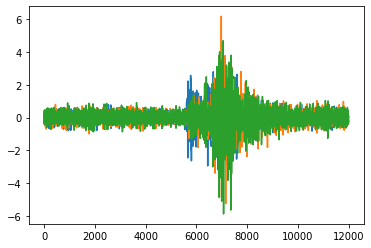

In [17]:
wave = train.get_waveforms(0)
plt.plot(wave.T)